# Melanoma Tumor Size Prediction

# 2. Exploratory Data Analysis

## 2.1 Imports

In [1]:
# Import the libraries necessary for the current task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import scale
import os

# pandas Configuration
pd.set_option("max_rows", 120)
pd.set_option("max_columns", 120)
pd.set_option("display.max_colwidth", None)

## 2.2 Data

In [2]:
# Load the CSV data
melanoma_data = pd.read_csv(r"C:\Users\lastr\Desktop\GitHub\Melanoma_Capstone\data\melanoma.csv")

## 2.3 Data Exploration

In [3]:
# Summary of the data
melanoma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       9146 non-null   float64
 1   size_npear      9146 non-null   float64
 2   malign_ratio    9146 non-null   float64
 3   damage_size     9146 non-null   float64
 4   exposed_area    9146 non-null   float64
 5   std_dev_malign  9146 non-null   float64
 6   err_malign      9146 non-null   float64
 7   malign_penalty  9146 non-null   int64  
 8   damage_ratio    9146 non-null   float64
 9   tumor_size      9146 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 714.7 KB


In [4]:
# First 5 entries of the data
melanoma_data.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


### 2.3.1 Feature Correlations

#### 2.3.1.1 Correlation Heatmap

Text(0.5, 1.0, 'Melanoma Tumor Correlation Heatmap')

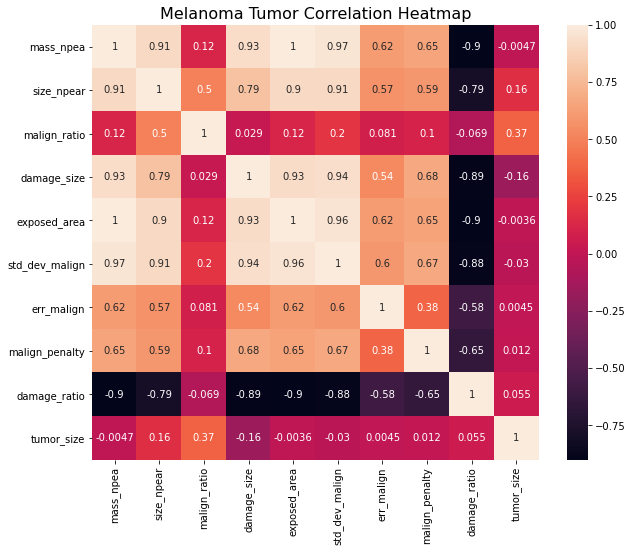

In [5]:
# Visualize correlations using a heatmap
plt.subplots(figsize=(10,8))
ax = plt.axes()
sns.heatmap(melanoma_data.corr(), annot=True, xticklabels=True, yticklabels=True, ax=ax)
ax.set_title("Melanoma Tumor Correlation Heatmap", fontsize=16)

#### 2.3.1.2 Scatter Plots of All Features

Text(0.5, 0.98, 'Scatter Plots for All Features')

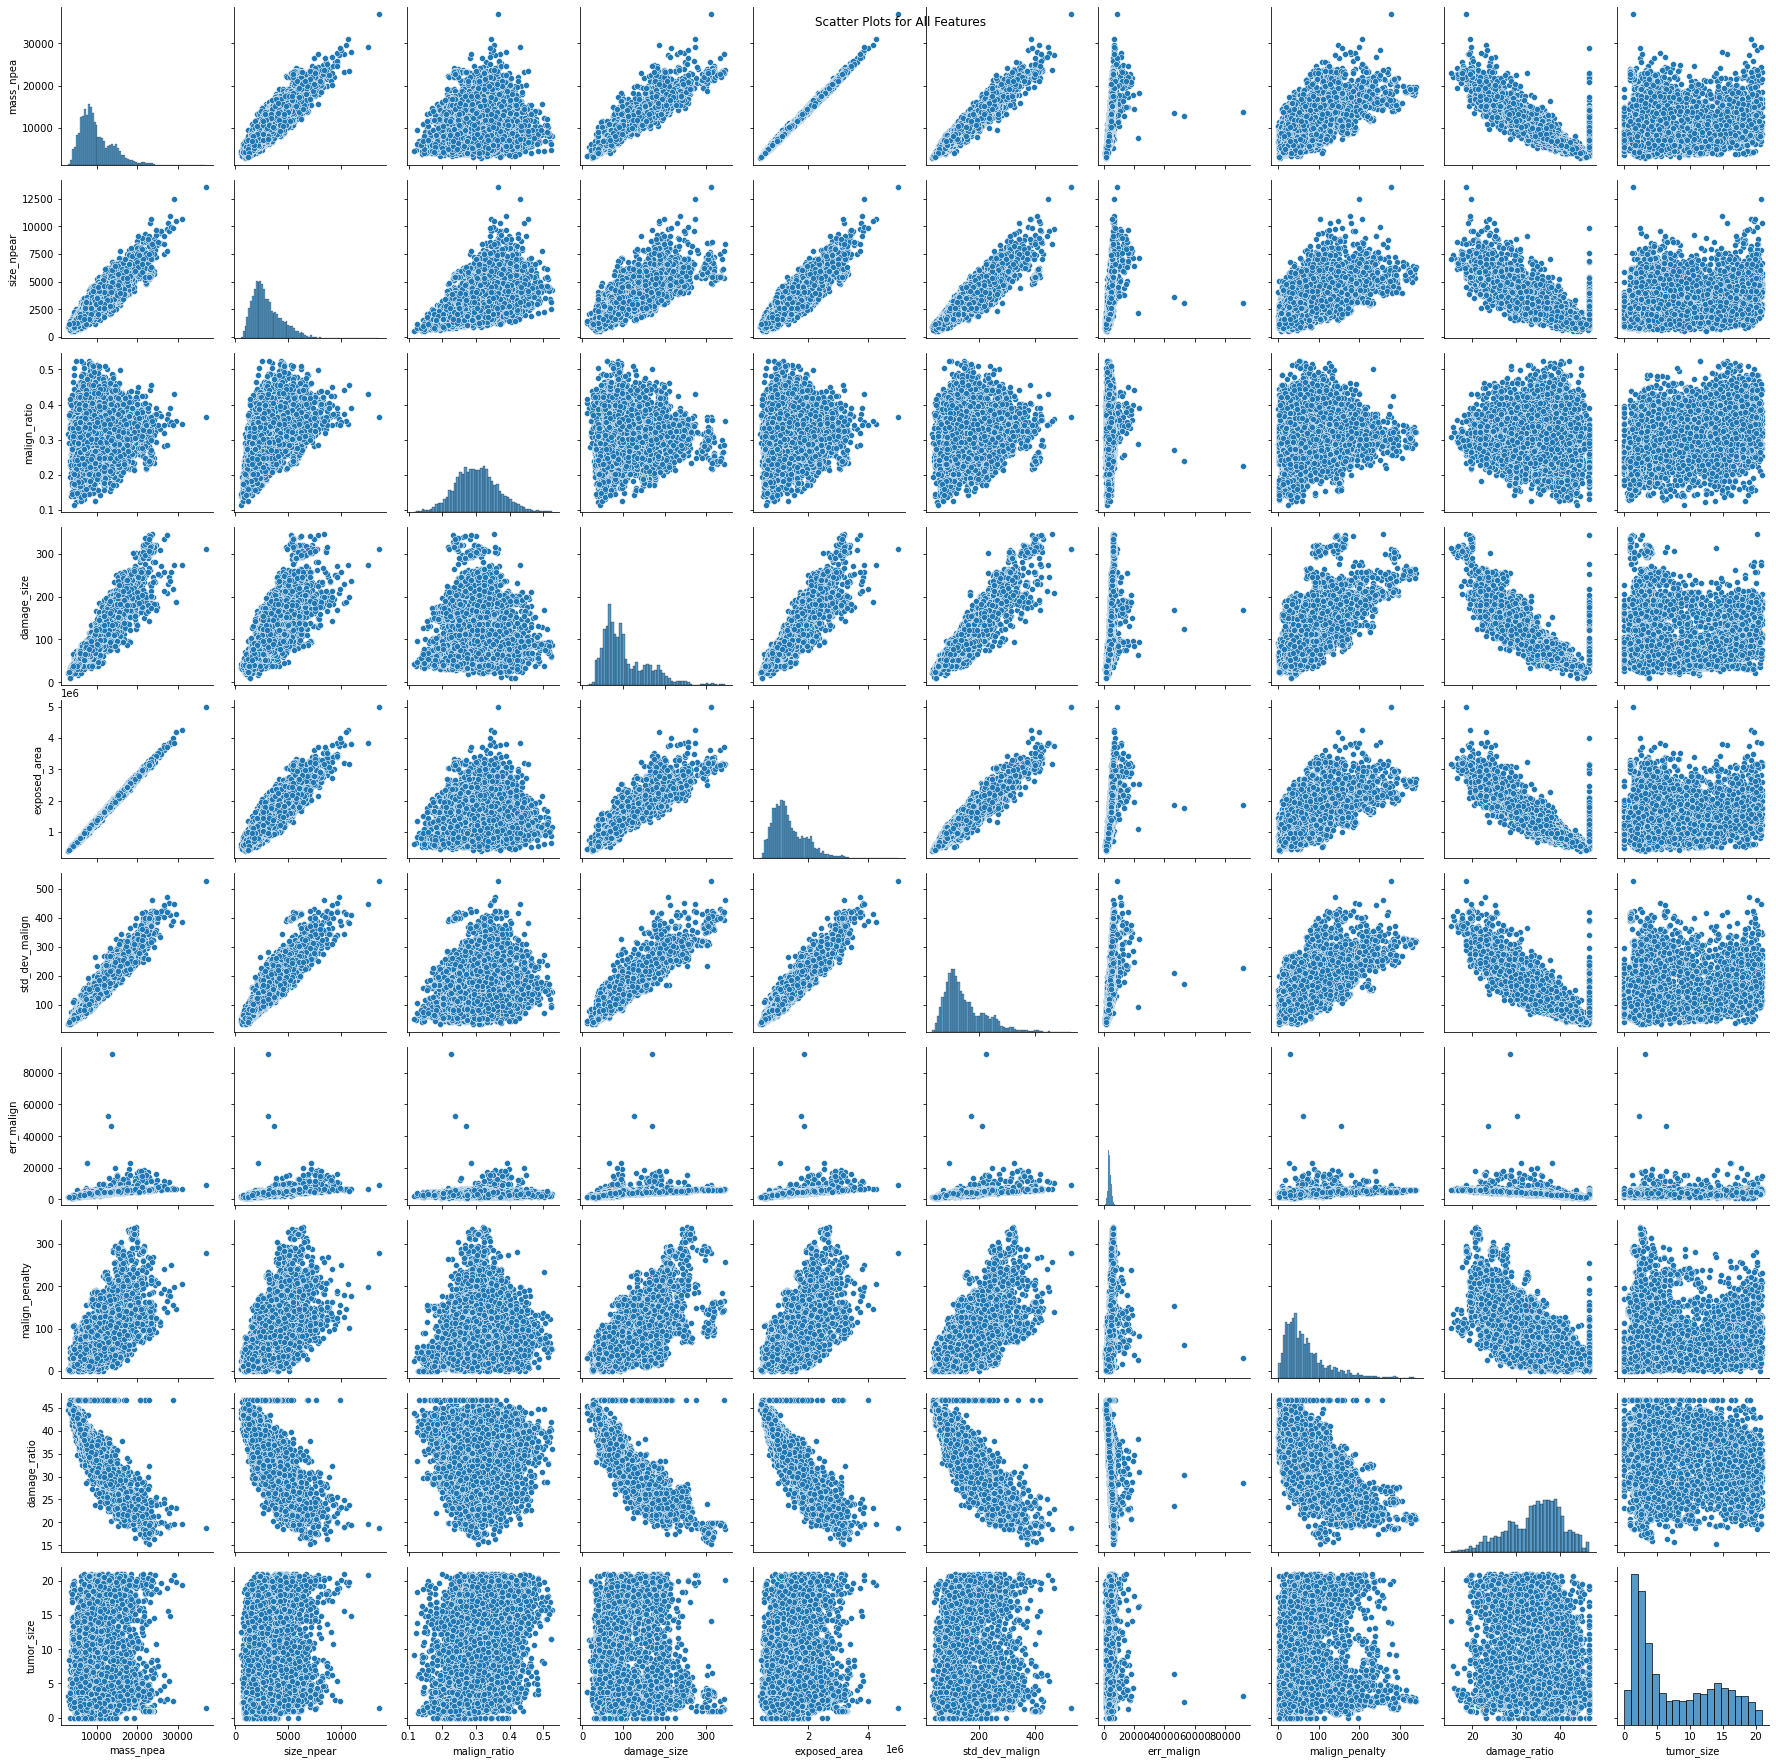

In [12]:
# Generate scatter plots of all features
all_scatterplots = sns.PairGrid(melanoma_data)
all_scatterplots.map_diag(sns.histplot)
all_scatterplots.map_offdiag(sns.scatterplot)
all_scatterplots.fig.suptitle('Scatter Plots for All Features')

### 2.3.2 Correlation between the Target and Other Features

In [8]:
# Create a function to generate scatter plots of tumor sizes against other features
def scatterplots(columns, ncol=None, figsize=(12, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.2, hspace=0.3)
    
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x=col, y="tumor_size", data=melanoma_data, alpha=0.05)
        ax.set(xlabel=col, ylabel="Tumor Size")
    
    nsubplots = nrow * ncol
    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [9]:
# List of features except the target feature
features = [feature for feature in melanoma_data.columns if feature != "tumor_size"]

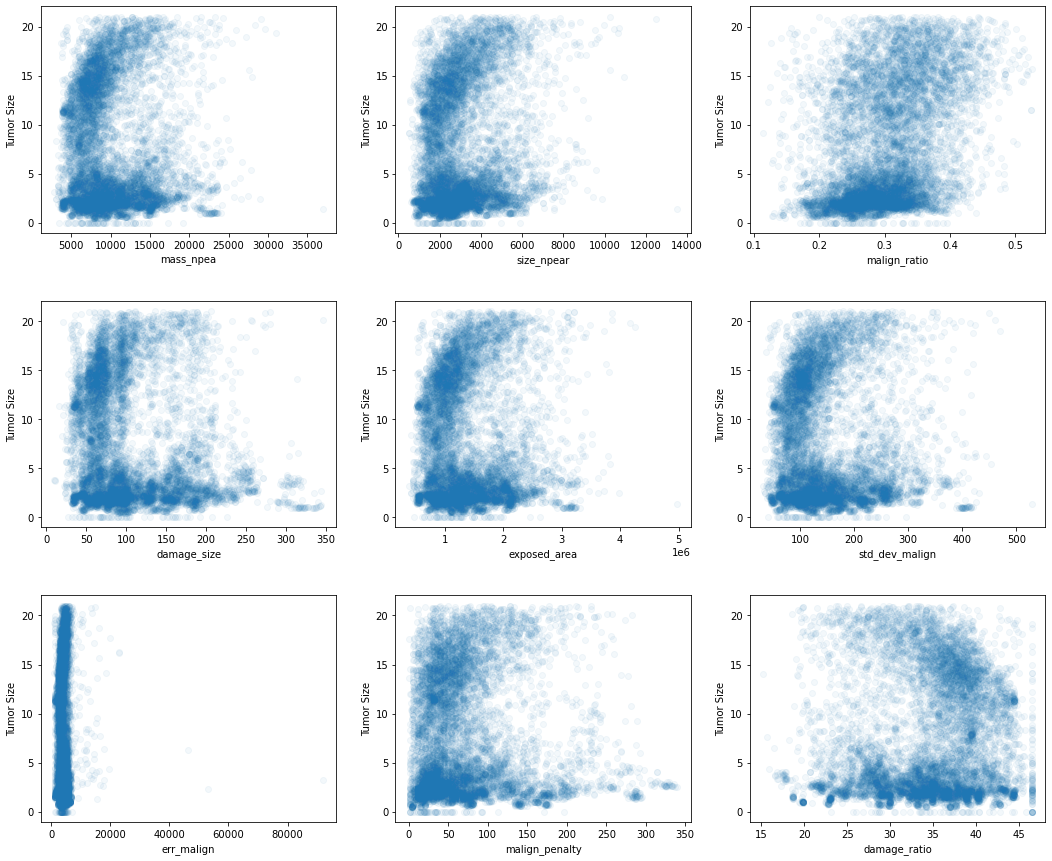

In [10]:
# Generate scatter plots
scatterplots(features, ncol=3, figsize=(18, 15))

In [6]:
# Target feature correlations
tumor_size_corr = melanoma_data.corr()["tumor_size"].sort_values()

print("Positive Correlations\n", tumor_size_corr[tumor_size_corr > 0])
print("\nNegative Correlations\n", tumor_size_corr[tumor_size_corr < 0])

Positive Correlations
 err_malign        0.004484
malign_penalty    0.011871
damage_ratio      0.054892
size_npear        0.164761
malign_ratio      0.374273
tumor_size        1.000000
Name: tumor_size, dtype: float64

Negative Correlations
 damage_size      -0.163804
std_dev_malign   -0.030085
mass_npea        -0.004679
exposed_area     -0.003641
Name: tumor_size, dtype: float64


Most notable `tumor_size` Correlations:
    
    * size_npear
    * malign_ratio
    * damage_size